# OrderExtend example with boat image 

###### This note shows how the OrderExtend algorithm performs the matrix completion task on a partially observed image data.

First, read boat image file and display.

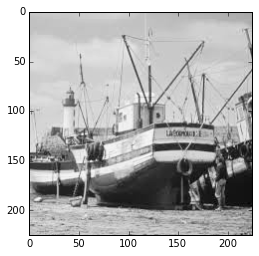

In [1]:
%matplotlib inline

import numpy as np
from scipy import ndimage
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from model import OrderExtend

img = ndimage.imread('images/boat.jpeg', flatten=True)

img /= np.max(img) #normalize image

plt.imshow(img, cmap = cm.Greys_r)

##### Prepare the model.

We assume 30% of matrix is observed, and set the rank to 50.

Initial model is running with 50 iterations.

2015-08-16 22:20:04 INFO:OrderExtend:Init x matrix norm 29.535
INFO:OrderExtend:Init x matrix norm 29.535
2015-08-16 22:20:04 INFO:OrderExtend:Init y matrix norm 1.000
INFO:OrderExtend:Init y matrix norm 1.000
2015-08-16 22:20:05 INFO:OrderExtend:Total budget used: 2825
INFO:OrderExtend:Total budget used: 2825
2015-08-16 22:20:05 INFO:OrderExtend:Final relative error: 0.962
INFO:OrderExtend:Final relative error: 0.962
2015-08-16 22:20:05 INFO:OrderExtend:Solved x-dim: 74 y-dim: 50
INFO:OrderExtend:Solved x-dim: 74 y-dim: 50


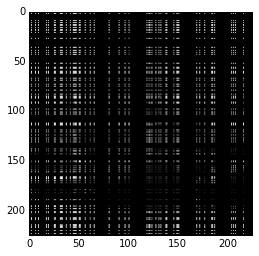

In [2]:
nx,ny = img.shape
r = 50
p = 0.3
max_iter = 50

# mask of the observed pixels (randomly chosen)
sigma = np.random.binomial(1, p, size=(nx,ny))   

model = OrderExtend(img, sigma, r)
order = model.init()
r_img, x, y = model.fit(order, max_iter=max_iter)

plt.imshow(r_img, cmap = cm.Greys_r)

Now we set the iteration number to 200, and rerun the model.

2015-08-16 22:20:11 INFO:OrderExtend:Total budget used: 7576
INFO:OrderExtend:Total budget used: 7576
2015-08-16 22:20:11 INFO:OrderExtend:Final relative error: 0.908
INFO:OrderExtend:Final relative error: 0.908
2015-08-16 22:20:11 INFO:OrderExtend:Solved x-dim: 175 y-dim: 50
INFO:OrderExtend:Solved x-dim: 175 y-dim: 50


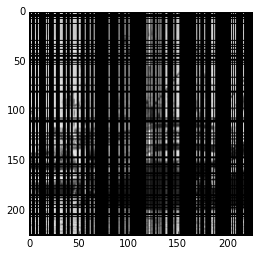

In [3]:
r_img, x, y = model.fit(order, max_iter=200)
plt.imshow(r_img, cmap = cm.Greys_r)

##### The model cannot solve any dimension of y-axis except the dimensions used in initialization, because the model decides that the initial matrix of x-axis is highly unstable to solve following linear systems. In other words, the local condition number of initial matrix is greater than the threshold. Now let's increase the threshold to 5.

2015-08-17 09:17:18 INFO:OrderExtend:Init x matrix norm 28.365
INFO:OrderExtend:Init x matrix norm 28.365
2015-08-17 09:17:18 INFO:OrderExtend:Init y matrix norm 1.000
INFO:OrderExtend:Init y matrix norm 1.000
2015-08-17 09:17:24 INFO:OrderExtend:Total budget used: 7973
INFO:OrderExtend:Total budget used: 7973
2015-08-17 09:17:24 INFO:OrderExtend:Final relative error: 1.518
INFO:OrderExtend:Final relative error: 1.518
2015-08-17 09:17:24 INFO:OrderExtend:Solved x-dim: 92 y-dim: 110
INFO:OrderExtend:Solved x-dim: 92 y-dim: 110


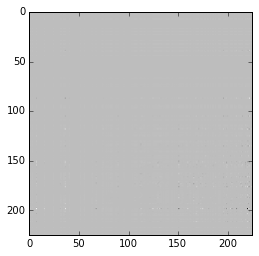

In [4]:
#set the threshold to 5
theta = 5

nx,ny = img.shape
r = 50
p = 0.3
max_iter = 250

# mask of the observed pixels (randomly chosen)
sigma = np.random.binomial(1, p, size=(nx,ny))   

# initialize another model with new theta
model = OrderExtend(img, sigma, r, theta)
order = model.init()
r_img, x, y = model.fit(order, max_iter=max_iter)

plt.imshow(r_img, cmap = cm.Greys_r)

In [5]:
print(np.max(r_img), np.min(r_img))

42.9235936452 -72.3622778067


#### After we set the threshold to 5, the system tries to solve unstable linear equations. Consequently, there is a great gap between the predicted and original matrix